# Análise de Acidentes de Trânsito no Brasil (2025)

Este projeto faz parte da disciplina **Introdução à Ciência de Dados** e tem como objetivo analisar dados de acidentes de trânsito ocorridos no Brasil [ao decorrer do tempo]. Utilizando técnicas de análise exploratória de dados, visualização e estatística, buscamos identificar padrões, causas e fatores relacionados aos acidentes, além de propor insights para prevenção e melhoria da segurança viária.

## Objetivos do Projeto

- Explorar e compreender o conjunto de dados de acidentes de trânsito.
- Identificar as principais causas e tipos de acidentes.
- Analisar a distribuição dos acidentes por estado, município, dia da semana e horário.
- Avaliar o impacto dos acidentes em termos de vítimas (mortos, feridos leves e graves).
- Visualizar o evoluçao/regreção dos acidentes no país no decorrer dos anos.
- Visualizar os dados para facilitar a interpretação e comunicação dos resultados.

## Fonte dos Dados

Os dados utilizados neste projeto foram extraídos do sistema DATATRAN, dados disponibilizados pela PRF contendo informações detalhadas sobre cada ocorrência, como local, horário, condições meteorológicas, tipo de pista, número de vítimas, entre outros.

---


# Link para o Dicionário do DATASET
https://drive.google.com/file/d/11zOQvccvoVSImByIp5-E0PxJ2larrEXy/view

# Importações:

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


# Informações Pincipais da Tabela:
---

In [3]:
tabela2025 = pd.read_csv('datatran2025.csv', sep=';')
tabela2024 = pd.read_csv('datatran2024.csv', sep=';')
tabela2023 = pd.read_csv('datatran2023.csv', sep=';')
tabela2022 = pd.read_csv('datatran2022.csv', sep=';')
tabela2021 = pd.read_csv('datatran2021.csv', sep=';')
tabela2020 = pd.read_csv('datatran2020.csv', sep=';')

tabela2020_2025 = pd.concat([tabela2020, tabela2021, tabela2022, tabela2023, tabela2024, tabela2025], ignore_index=True)


In [4]:
tabela2020_2025

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260068.0,2020-01-01,quarta-feira,05:40:00,PA,316,84,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,Saída de leito carroçável,...,0,0,1,2,2,"-1,3101929","-47,74456398",SPRF-PA,DEL01-PA,UOP02-DEL01-PA
1,260073.0,2020-01-01,quarta-feira,06:00:00,MG,262,804,UBERABA,Falta de Atenção à Condução,Colisão transversal,...,0,3,0,1,2,"-19,76747537","-47,98725511",SPRF-MG,DEL13-MG,UOP01-DEL13-MG
2,260087.0,2020-01-01,quarta-feira,06:00:00,BA,116,191,CANUDOS,Condutor Dormindo,Saída de leito carroçável,...,0,0,2,0,3,"-10,32002103","-39,06425211",SPRF-BA,DEL07-BA,UOP02-DEL07-BA
3,260116.0,2020-01-01,quarta-feira,10:08:00,SP,116,71,APARECIDA,Não guardar distância de segurança,Colisão traseira,...,0,1,0,2,2,"-22,85651665","-45,23114328",SPRF-SP,DEL08-SP,UOP01-DEL08-SP
4,260129.0,2020-01-01,quarta-feira,12:10:00,MG,262,"380,9",JUATUBA,Condutor Dormindo,Saída de leito carroçável,...,0,0,1,1,2,"-19,947864","-44,381226",SPRF-MG,DEL01-MG,UOP03-DEL01-MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368380,705679.0,2025-05-23,sexta-feira,17:07:00,BA,324,600,SIMOES FILHO,Ausência de reação do condutor,Queda de ocupante de veículo,...,0,0,0,1,1,"-12,77075662","-38,42161417",SPRF-BA,DEL01-BA,UOP01-DEL01-BA
368381,705735.0,2025-06-29,domingo,08:30:00,SP,381,59,MAIRIPORA,Manobra de mudança de faixa,Colisão lateral mesmo sentido,...,0,1,0,1,2,"-23,28048922","-46,58644867",SPRF-SP,DEL03-SP,UOP01-DEL03-SP
368382,705751.0,2025-06-05,quinta-feira,18:25:00,RJ,465,10,SEROPEDICA,Demais falhas mecânicas ou elétricas,Colisão lateral mesmo sentido,...,0,1,0,1,2,"-22,8065671","-43,6390686",SPRF-RJ,DEL06-RJ,UOP02-DEL06-RJ
368383,705809.0,2025-05-01,quinta-feira,19:50:00,SE,101,"98,6",SAO CRISTOVAO,Velocidade Incompatível,Colisão traseira,...,0,0,1,0,2,"-10,930556","-37,185833",SPRF-SE,DEL02-SE,UOP01-DEL02-SE


In [5]:
print(tabela2020_2025.info())

tabela2020_2025 = tabela2020_2025.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368385 entries, 0 to 368384
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      368385 non-null  float64
 1   data_inversa            368385 non-null  object 
 2   dia_semana              368385 non-null  object 
 3   horario                 368385 non-null  object 
 4   uf                      368385 non-null  object 
 5   br                      368385 non-null  int64  
 6   km                      368385 non-null  object 
 7   municipio               368385 non-null  object 
 8   causa_acidente          368385 non-null  object 
 9   tipo_acidente           368384 non-null  object 
 10  classificacao_acidente  368378 non-null  object 
 11  fase_dia                368385 non-null  object 
 12  sentido_via             368385 non-null  object 
 13  condicao_metereologica  368385 non-null  object 
 14  tipo_pista          

In [6]:
print(tabela2020_2025['causa_acidente'].value_counts())


causa_acidente
Reação tardia ou ineficiente do condutor                     41238
Ausência de reação do condutor                               38486
Velocidade Incompatível                                      28191
Acessar a via sem observar a presença dos outros veículos    27412
Falta de Atenção à Condução                                  22394
                                                             ...  
Redutor de velocidade em desacordo                              35
Faróis desregulados                                             33
Sinalização encoberta                                           18
Sistema de drenagem ineficiente                                 12
Obstrução Via tentativa Assalto                                 10
Name: count, Length: 91, dtype: int64


# Analise Temporal
-----

In [7]:
# Convertendo a data inversa pra datetime
tabela2020_2025['data_inversa'] = pd.to_datetime(tabela2020_2025['data_inversa'],errors='coerce')

meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
         7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# Criando colunas derivadas
tabela2020_2025.loc[:,'ano'] = tabela2020_2025['data_inversa'].dt.year
tabela2020_2025.loc[:,'mes'] = tabela2020_2025['data_inversa'].dt.month
tabela2020_2025.loc[:,'hora'] = pd.to_datetime(tabela2020_2025['horario'], format='%H:%M:%S', errors='coerce').dt.hour

tabela2020_2025['mes'] = tabela2020_2025['mes'].map(meses)

display(tabela2020_2025.head())

C:\Users\henri\AppData\Local\Temp\ipykernel_50168\3557136029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela2020_2025['data_inversa'] = pd.to_datetime(tabela2020_2025['data_inversa'],errors='coerce')
C:\Users\henri\AppData\Local\Temp\ipykernel_50168\3557136029.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela2020_2025.loc[:,'ano'] = tabela2020_2025['data_inversa'].dt.year
C:\Users\henri\AppData\Local\Temp\ipykernel_50168\3557136029.py:9: SettingWithCopyWarning: 
A value is trying to be s

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos,veiculos,latitude,longitude,regional,delegacia,uop,ano,mes,hora
1,260073.0,2020-01-01,quarta-feira,06:00:00,MG,262,804,UBERABA,Falta de Atenção à Condução,Colisão transversal,...,1,2,"-19,76747537","-47,98725511",SPRF-MG,DEL13-MG,UOP01-DEL13-MG,2020,Janeiro,6
2,260087.0,2020-01-01,quarta-feira,06:00:00,BA,116,191,CANUDOS,Condutor Dormindo,Saída de leito carroçável,...,0,3,"-10,32002103","-39,06425211",SPRF-BA,DEL07-BA,UOP02-DEL07-BA,2020,Janeiro,6
3,260116.0,2020-01-01,quarta-feira,10:08:00,SP,116,71,APARECIDA,Não guardar distância de segurança,Colisão traseira,...,2,2,"-22,85651665","-45,23114328",SPRF-SP,DEL08-SP,UOP01-DEL08-SP,2020,Janeiro,10
4,260129.0,2020-01-01,quarta-feira,12:10:00,MG,262,"380,9",JUATUBA,Condutor Dormindo,Saída de leito carroçável,...,1,2,"-19,947864","-44,381226",SPRF-MG,DEL01-MG,UOP03-DEL01-MG,2020,Janeiro,12
5,260147.0,2020-01-01,quarta-feira,14:15:00,PR,116,"32,1",CAMPINA GRANDE DO SUL,Velocidade Incompatível,Colisão com objeto estático,...,0,2,"-25,10497579","-48,83973903",SPRF-PR,DEL01-PR,UOP02-DEL01-PR,2020,Janeiro,14


In [8]:
tabela2020_2025['horario'].unique()

array(['06:00:00', '10:08:00', '12:10:00', ..., '02:36:00', '04:04:00',
       '03:39:00'], dtype=object)

In [9]:
# Acidentes por dia da semana
acidentes_por_dia = tabela2020_2025['dia_semana'].value_counts()

print('Acidentes por dia:')
print(tabela2020_2025)



Acidentes por dia:
              id data_inversa    dia_semana   horario  uf   br     km  \
1       260073.0   2020-01-01  quarta-feira  06:00:00  MG  262    804   
2       260087.0   2020-01-01  quarta-feira  06:00:00  BA  116    191   
3       260116.0   2020-01-01  quarta-feira  10:08:00  SP  116     71   
4       260129.0   2020-01-01  quarta-feira  12:10:00  MG  262  380,9   
5       260147.0   2020-01-01  quarta-feira  14:15:00  PR  116   32,1   
...          ...          ...           ...       ...  ..  ...    ...   
368380  705679.0   2025-05-23   sexta-feira  17:07:00  BA  324    600   
368381  705735.0   2025-06-29       domingo  08:30:00  SP  381     59   
368382  705751.0   2025-06-05  quinta-feira  18:25:00  RJ  465     10   
368383  705809.0   2025-05-01  quinta-feira  19:50:00  SE  101   98,6   
368384  705883.0   2025-06-22       domingo  12:30:00  MG  354    764   

                    municipio                        causa_acidente  \
1                     UBERABA    

In [10]:
# Acidentes por hora
acidentes_por_hora = tabela2020_2025['horario'].value_counts().sort_values(ascending=False)

print('\nAcidentes por hora:')
print(acidentes_por_hora)


Acidentes por hora:
horario
19:00:00    5379
18:00:00    5119
18:30:00    4804
17:00:00    4445
17:30:00    4081
            ... 
02:07:00       3
04:09:00       3
01:19:00       3
03:39:00       2
04:04:00       1
Name: count, Length: 1440, dtype: int64


In [11]:
# Acidentes por mês
acidentes_por_mes = tabela2020_2025.groupby('mes').size()

print('\nAcidentes por mês:')
print(acidentes_por_mes)


Acidentes por mês:
mes
Abril        31265
Agosto       28642
Dezembro     31074
Fevereiro    30602
Janeiro      32510
Julho        28935
Junho        33173
Maio         33532
Março        32202
Novembro     27782
Outubro      29816
Setembro     28535
dtype: int64


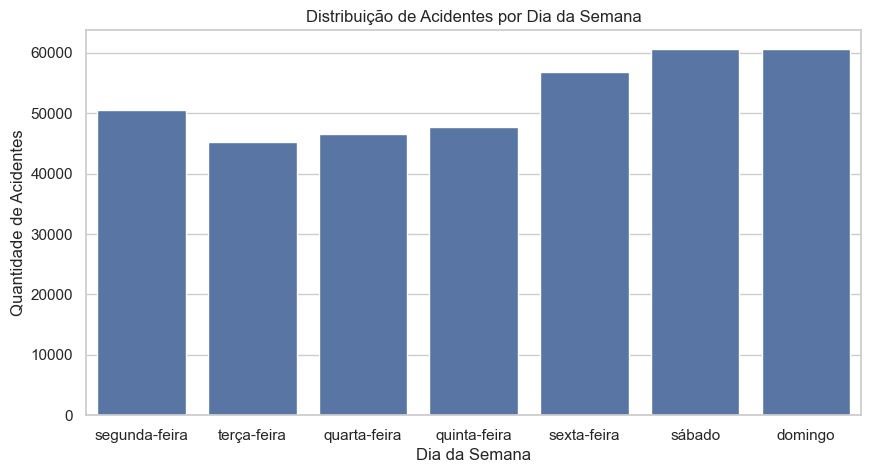

In [12]:
sns.set_theme(style="whitegrid")


# Acidentes por Dia da Semana
plt.figure(figsize=(10,5))
sns.countplot(data=tabela2020_2025, x='dia_semana', order=['segunda-feira','terça-feira','quarta-feira','quinta-feira','sexta-feira','sábado','domingo'])
plt.title('Distribuição de Acidentes por Dia da Semana')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Dia da Semana')
plt.show()

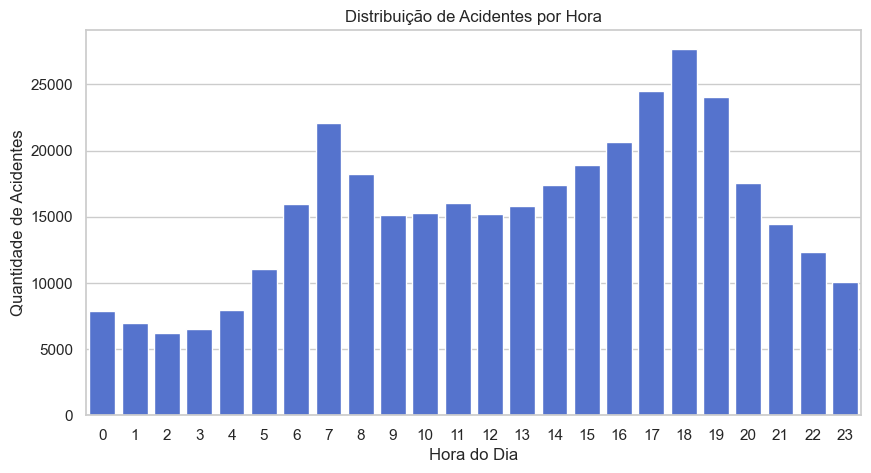

In [13]:
# Acidentes por hora do dia
plt.figure(figsize=(10,5))
sns.countplot(data=tabela2020_2025, x='hora', color='royalblue')
plt.title('Distribuição de Acidentes por Hora')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Hora do Dia')
plt.show()

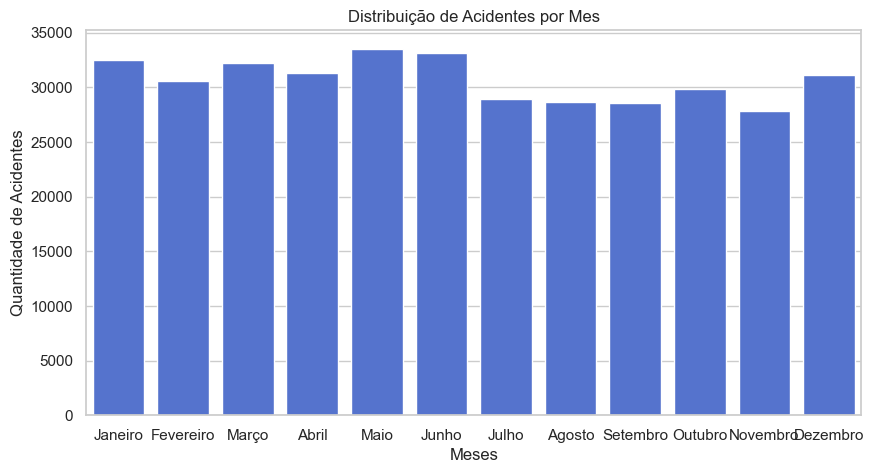

In [21]:
# Acidentes por mes
plt.figure(figsize=(10,5))
sns.countplot(data=tabela2020_2025, x='mes', color='royalblue')
plt.title('Distribuição de Acidentes por Mes')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Meses')
plt.show()

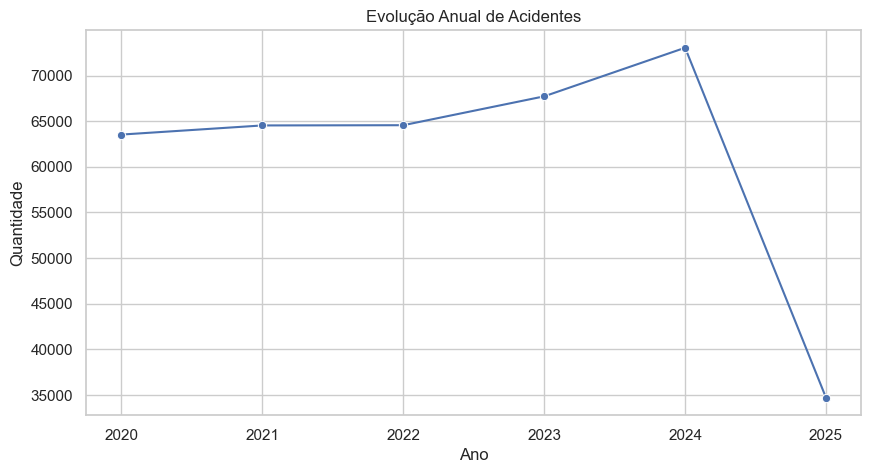

In [16]:
# Evolução ao longo dos anos (linha)
evolucao = tabela2020_2025.groupby('ano').size().reset_index(name='acidentes')
plt.figure(figsize=(10,5))
sns.lineplot(data=evolucao, x='ano', y='acidentes', marker='o')
plt.title('Evolução Anual de Acidentes')
plt.ylabel('Quantidade')
plt.xlabel('Ano')
plt.show()

## Primeira Conclusão da Análise Temporal
Apesar de percebermos que os dados estão bem destribuidos, nos finais de semana à noite, entre às 17 e 19 horas, são onde ocorrem a maioria dos acidentes

---

In [17]:
alcool = tabela2020_2025[tabela2020_2025['causa_acidente'] == 'Ingestão de álcool pelo condutor']
#display(alcool)

print(f"Totais de casos com alcool: {alcool.shape[0]} casos")

Totais de casos com alcool: 18265 casos


# Analise Geografica
---

In [18]:
# Locais de Principais Ocorrências de Acidentes
# Acidentes por UF (estado)
print(tabela2020_2025['uf'].value_counts())

# Acidentes por município
print(tabela2020_2025['municipio'].value_counts())

uf
MG    47736
SC    42781
PR    40232
RJ    28498
RS    26236
SP    24634
BA    20124
GO    17463
PE    15490
ES    13250
MT    12671
MS     9135
PB     8832
CE     8054
RO     7850
RN     7685
PI     6915
MA     6196
DF     5436
PA     4975
AL     3456
TO     3348
SE     3005
AC     1410
RR     1097
AP      881
AM      678
Name: count, dtype: int64
municipio
BRASILIA                 5436
CURITIBA                 4343
GUARULHOS                4197
SAO JOSE                 3832
DUQUE DE CAXIAS          3577
                         ... 
SAO RAIMUNDO NONATO         1
PRESIDENTE VARGAS           1
SUMIDOURO                   1
SAO FELIX DO ARAGUAIA       1
IACU                        1
Name: count, Length: 2031, dtype: int64


## Conclusões Análise Geografica:
Estados de Minas Gerais, Santa Catarina, Paraná, Rio de Janeiro e Rio Grande do Sul são os estados mais abundantes em acidentes de t^ransito. A gente pode restringir a pesquisa para esses 5 estados.

---

# Gravidade e Vítimas 
---

In [27]:
# Classificação dos acidentes
print(tabela2020_2025['classificacao_acidente'].value_counts())
pd.set_option('display.max_rows', None)


# Mortos e feridos leves por tipo de acidente
resultado = tabela2020_2025.groupby('causa_acidente')[['mortos', 'feridos_leves']].sum()
resultado['total'] = resultado['mortos'] + resultado['feridos_leves']
resultado_ordenado = resultado.sort_values('total', ascending=False)

print(resultado_ordenado)


classificacao_acidente
Com Vítimas Feridas    278998
Sem Vítimas             62659
Com Vítimas Fatais      26411
Name: count, dtype: int64
                                                    mortos  feridos_leves  \
causa_acidente                                                              
Reação tardia ou ineficiente do condutor              2529          37450   
Ausência de reação do condutor                        2797          31836   
Velocidade Incompatível                               3027          25164   
Acessar a via sem observar a presença dos outro...    1631          24561   
Falta de Atenção à Condução                           1244          19681   
Condutor deixou de manter distância do veículo ...     425          18562   
Manobra de mudança de faixa                           1057          16576   
Condutor Dormindo                                     1184          11385   
Ingestão de álcool pelo condutor                       914          11410   
Transitar na c

In [20]:
# Total de mortos e feridos em acidentes com álcool
print(tabela2020_2025['mortos'].value_counts())
print(f'Total: {0}',tabela2020_2025['mortos'].value_counts(ascending=False).sum())

mortos
0     341657
1      23376
2       2270
3        472
4        179
5         71
6         18
7         10
9          3
12         3
8          3
13         1
19         1
23         1
11         1
14         1
37         1
Name: count, dtype: int64
Total: 0 368068
